<a href="https://colab.research.google.com/github/chiyanglin-AStar/2025_physics_note/blob/main/00_NN_wo_lib_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Implement Neural Network without using deep learning libraries, step by step tutorial, python3](https://medium.com/@qempsil0914/implement-neural-network-without-using-deep-learning-libraries-step-by-step-tutorial-python3-e2aa4e5766d1)

### First Step: Preparing Dataset

In [11]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data # features, 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'
y = iris.target # label, 'setosa' 'versicolor' 'virginica'

print('A data:', X[0], '\nLabel:', y[0])
'''output
A data: [5.1 3.5 1.4 0.2]
Label: 0
'''

A data: [5.1 3.5 1.4 0.2] 
Label: 0


'output\nA data: [5.1 3.5 1.4 0.2]\nLabel: 0\n'

### Relabel Dataset

In [12]:
import numpy as np
re_y = np.array([1 if i==0 else 0 for i in y]) # relabel, 'setosa':1, 'not setosa':0
print(re_y)
'''output
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
'''

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


'output\n[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0]\n'

### Plot Dataset

<ipython-input-13-81692216b005>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(i, j, c=ori_color[color], marker='o', s=50, edgecolor='k',cmap=plt.cm.Spectral)
<ipython-input-13-81692216b005>:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(i, j, c=relbl_color[color], marker='o', s=50, edgecolor='k',cmap=plt.cm.Spectral)


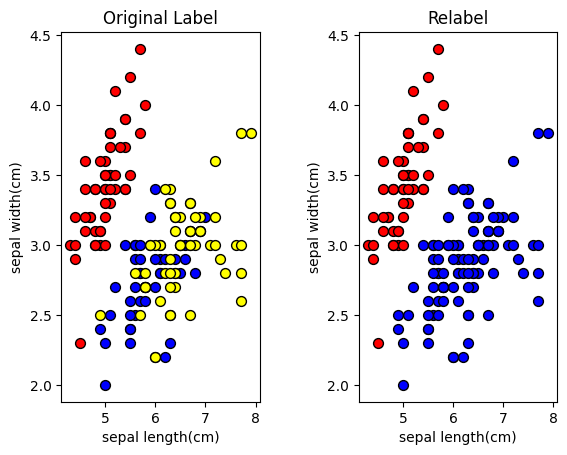

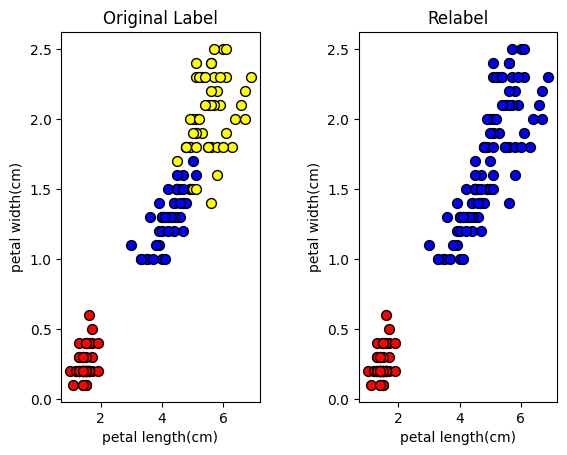

In [13]:
import matplotlib.pyplot as plt

def plot(xfeature_name, yfeature_name, xfeature, yfeature, ori_label, re_label):
    # setting color
    ori_color = {0: 'red', 1: 'blue', 2: 'yellow'} # label, 0:'setosa' 1:'versicolor' 2:'virginica'
    relbl_color = {0: 'blue', 1: 'red'} # relabel, 0:'not setosa' 1:'setosa'
    # plot oringinal label figure
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.subplots_adjust(wspace = 0.5)
    plt.title("Original Label")
    plt.xlabel(xfeature_name)
    plt.ylabel(yfeature_name)
    for i, j, color in zip(xfeature, yfeature, ori_label):
        plt.scatter(i, j, c=ori_color[color], marker='o', s=50, edgecolor='k',cmap=plt.cm.Spectral)
    # plot relabel figure
    plt.subplot(1, 2, 2)
    plt.title("Relabel")
    plt.xlabel(xfeature_name)
    plt.ylabel(yfeature_name)
    for i, j, color in zip(xfeature, yfeature, re_label):
        plt.scatter(i, j, c=relbl_color[color], marker='o', s=50, edgecolor='k',cmap=plt.cm.Spectral)

plot('sepal length(cm)', 'sepal width(cm)', X[:, 0], X[:, 1], y, re_y)
plot('petal length(cm)', 'petal width(cm)', X[:, 2], X[:, 3], y, re_y)
plt.show()

### Second Step — Building NN model

### Step2.1 — Initialization of an NN model
Firstly, initialize the model and set the weighting matrix W¹, W².

In [14]:
class my_NN(object):
    def __init__(self):
        self.input = 4 # feature numbers
        self.output = 1 # class number
        self.hidden_units = 6 # single layer

        # initialize matrix of weights;
        np.random.seed(1)
        # weight1: input -> hidden layer
        self.w1 = np.random.randn(self.input, self.hidden_units) # 4*6 matrix
        # weight2: hidden layer -> output
        self.w2 = np.random.randn(self.hidden_units, self.output) # 6*1 matrix

In [15]:
class my_NN(object):
    def _forward_propagation(self, X):
        self.z2 = np.dot(self.w1.T, X.T)
        self.a2 = self._sigmoid(self.z2)
        self.z3 = np.dot(self.w2.T, self.a2)
        self.a3 = self._sigmoid(self.z3)
        return self.a3

    def _sigmoid(self, z):
        return 1/(1+np.exp(-z))

### Step2.3 — Implement Loss Function (i.e. Cost Function)

In [16]:
class my_NN(object):
    def _loss(self, predict, y):
        m = y.shape[0]
        logprobs = np.multiply(np.log(predict), y) + np.multiply((1 - y), np.log(1 - predict))
        loss = - np.sum(logprobs) / m
        return loss

### Step2.4 — Implement Backward Propagation

In [22]:
class my_NN(object):
    def _backward_propagation(self, X, y):
        predict = self._forward_propagation(X)
        m = X.shape[0]
        delta3 = predict - y
        dz3 = np.multiply(delta3, self._sigmoid_prime(self.z3))
        self.dw2 = (1/m)*np.sum(np.multiply(self.a2, dz3), axis=1).reshape(self.w2.shape)

        delta2 = delta3*self.w2*self._sigmoid_prime(self.z2)
        self.dw1 = (1/m)*np.dot(X.T, delta2.T)

    def _sigmoid_prime(self, z):
        return self._sigmoid(z)*(1-self._sigmoid(z))

    def train(self, X, y, iteration=33):
        for i in range(iteration):
            y_hat = self._forward_propagation(X)
            loss = self._loss(y_hat, y)
            self._backward_propagation(X,y)
            self._update()
            if i%10==0:
                print("loss: ", loss)

In [21]:
class my_NN(object):
    def _update(self, learning_rate=1.2):
        self.w1 = self.w1 - learning_rate*self.dw1
        self.w2 = self.w2 - learning_rate*self.dw2

### Step2.5 — Implement Training and Testing Stage

In [19]:
```
class my_NN(object):
    def train(self, X, y, iteration=33):
        for i in range(iteration):
            y_hat = self._forward_propagation(X)
            loss = self._loss(y_hat, y)
            self._backward_propagation(X,y)
            self._update()
            if i%10==0:
                print("loss: ", loss)

    def predict(self, X):
        y_hat = self._forward_propagation(X)
        y_hat = [1 if i[0] >= 0.5 else 0 for i in y_hat.T]
        return np.array(y_hat)

    def score(self, predict, y):
        cnt = np.sum(predict==y)
        return (cnt/len(y))*100
```

### Third Step — Testing model

In [20]:
from sklearn.model_selection import train_test_split
if __name__=='__main__':
    train_X, test_X, train_y, test_y = train_test_split(X, re_y, test_size=0.25) # split training data and testing data
    clr = my_NN() #initialize the model
    clr.train(train_X, train_y) # train model
    pre_y = clr.predict(test_X) # predict
    score = clr.score(pre_y, test_y) # get the accuracy score
    print('predcit: ', pre_y)
    print('anser:', test_y)
    print('score: ', score)

    """ output
    loss:  0.8344088705247898
    loss:  0.5305104752379958
    loss:  0.45219731172374006
    loss:  0.3950426491193336

    predcit:  [0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1]
    anser: [0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1]
    score:  84.21052631578947
    """

AttributeError: 'my_NN' object has no attribute '_forward_propagation'